In [1]:
import numpy as np

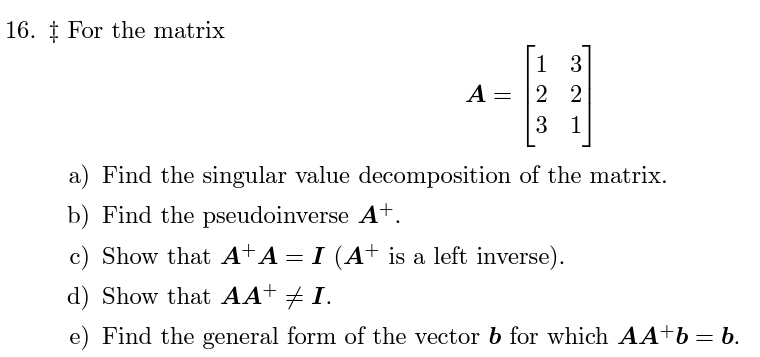

In [17]:
# A is 3x2 so expect U to be 3x3 and Vh to be 2x2
A = np.array([[1, 3], [2, 2], [3, 1]])
U, S, Vh = np.linalg.svd(A)
S_matrix = np.diag(S)

print(U)            # columns are eigenvectors of AAh
print(S)            # singular values
print(S_matrix)     # diagonal matrix with singular values down diagonal
print(Vh)           # rows are eigenvectors of AhA
print('\n')

# notice how this gives 3 eigenvectors for AAh but there are only 2 singular values (as V is 2x2 so can only have 2)
# this means the last column of U will always get multiplied by zeros if we pad out S_matrix
# so instead we just leave it out using the below argument:

U, S, Vh = np.linalg.svd(A, full_matrices=False)
S_matrix = np.diag(S)
print(U)

[[-5.77350269e-01  7.07106781e-01  4.08248290e-01]
 [-5.77350269e-01  2.77555756e-16 -8.16496581e-01]
 [-5.77350269e-01 -7.07106781e-01  4.08248290e-01]]
[4.89897949 2.        ]
[[4.89897949 0.        ]
 [0.         2.        ]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


[[-5.77350269e-01  7.07106781e-01]
 [-5.77350269e-01  2.77555756e-16]
 [-5.77350269e-01 -7.07106781e-01]]


- pseudoinverse of A is $VS^{-1}U^H$
- inverse of singular value matrix, should be padded with zeros to make dimensions match

In [22]:
Uh = np.transpose(U)
V = np.transpose(Vh)

# S inverse contains 1/singular values
S_inv = np.diag(1.0/S)

pseudoA = V @ (S_inv @ Uh)
print(pseudoA)

[[-0.16666667  0.08333333  0.33333333]
 [ 0.33333333  0.08333333 -0.16666667]]


- show that $A^+A = I$

In [23]:
print(pseudoA @ A)

[[ 1.00000000e+00  5.55111512e-17]
 [-2.22044605e-16  1.00000000e+00]]


- show that $AA^+$ is not equal to $I$

In [24]:
print(A @ pseudoA)

[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


part (e)
- $AA^+$ is the projection matrix which projects a vector onto the column space of A
- therefore applying the projection matrix to b only does nothing to b if b is already in column space of A
- b must lie in column space of A

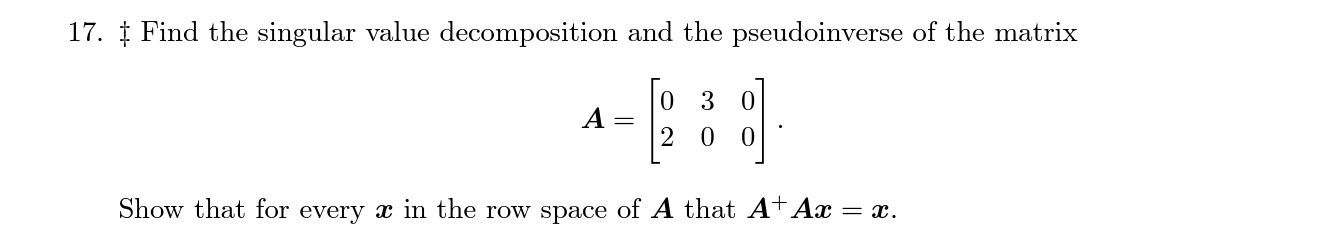

- A has two independent rows thus an x vector in its row space has one zero element
- A's row space is a plane

In [46]:
A = np.array([[0,3,0], [2,0,0]])
U, S, Vh = np.linalg.svd(A, full_matrices=False)    # reduced svd
Uh = np.transpose(U)
V = np.transpose(Vh)
S_inverse = np.diag(1.0/S)

print('SVD: ')
print(U)
print(np.diag(S))
print(Vh)

print('\nPseudo-inverse of A: ')
pseudoA = V @ (S_inverse @ Uh)
print(pseudoA)

print('\nPseudo-inverse of A by A: ')
pseudoA @ A
print("This doesn't do anything to any x vector that looks like:")
print(np.array([['x1'], ['x2'], [0]]))
print("And this is any vector that lies in row space of A")

SVD: 
[[1. 0.]
 [0. 1.]]
[[3. 0.]
 [0. 2.]]
[[0. 1. 0.]
 [1. 0. 0.]]

Pseudo-inverse of A: 
[[0.         0.5       ]
 [0.33333333 0.        ]
 [0.         0.        ]]

Pseudo-inverse of A by A: 
This doesn't do anything to any x vector that looks like:
[['x1']
 ['x2']
 ['0']]
And this is any vector that lies in row space of A


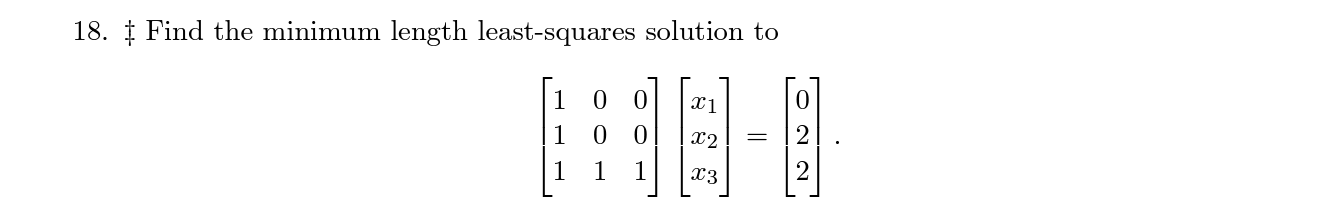

- there are only two independent rows, thus rank is 2, r = 2
- A is rank deficient, r < no. of columns/rows
- because of this, the last singular value of A is 0

In [74]:
A = np.array([[1,0,0], [1,0,0], [1,1,1]])
b = np.array([0, 2, 2])
U, S, Vh = np.linalg.svd(A)
S

array([2., 1., 0.])

- the last singular value being zero means that all possible x3 values just get mapped to zero
- on our least squares minimiser for the rank deficient case, we use the inverse of singular value matrix with just the non-zero sing. values

In [78]:
S_matrix_one_inv = np.diag(1.0/S[0:2])      # only use first two singular values
S_matrix_one_inv

array([[0.5, 0. ],
       [0. , 1. ]])

In [79]:
# get rid of last column of U (eigenvector that matches the zero singular value)
U_one = np.array([U[0][0:2], U[1][0:2], U[2][0:2]])
U_one

array([[-0.40824829, -0.57735027],
       [-0.40824829, -0.57735027],
       [-0.81649658,  0.57735027]])

In [80]:
# get rid of last row of Vh (eigenvector that matches zero singlular value)
V_one = Vh[0:2]

- the least square minimiser is: $x' = V_1 S_1^{-1} U_1^{H}  b $

In [77]:
ls_minimiser = np.transpose(V_one) @ (S_matrix_one_inv @ np.transpose(U_one))
x_hat = ls_minimiser @ b
x_hat

array([1. , 0.5, 0.5])

In [81]:
matrix = np.array([[-1, 1],[1,-1]])
eigenvectors = np.linalg.eig(matrix)
eigenvectors

(array([ 0., -2.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))